<a href="https://colab.research.google.com/github/srikardurgam/CradleToGraveR/blob/main/nflfastR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
YEAR = 2020

data = pd.read_csv(
    'https://github.com/guga31bb/nflfastR-data/blob/master/data/play_by_play_' \
    + str(YEAR) + '.csv.gz?raw=True',compression='gzip', low_memory=False
    )

In [ ]:
data.shape

(11666, 340)

In [ ]:
data.columns

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'receiver_id', 'name', 'jersey_number', 'id', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd'],
      dtype='object', length=340)

In [ ]:
data.dtypes

play_id                  int64
game_id                 object
old_game_id              int64
home_team               object
away_team               object
                        ...   
xyac_epa               float64
xyac_mean_yardage      float64
xyac_median_yardage    float64
xyac_success           float64
xyac_fd                float64
Length: 340, dtype: object

In [ ]:
data.head(3)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,...,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,aborted_play,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd
0,1,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,NaN,NaN,NaN,NaN,NaN,2020-09-13,900.0,1800.0,3600.0,Half1,0,NaN,0,1,NaN,0,15:00,ARI 35,0,NaN,GAME,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,ARI,35.0,2020-09-13,900.0,1800.0,3600.0,Half1,0,1.0,0,1,NaN,0,15:00,ARI 35,0,41.0,5-Z.Gonzalez kicks 65 yards from ARI 35 to end...,kickoff,0.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
2,54,2020_01_ARI_SF,2020091311,SF,ARI,REG,1,SF,home,ARI,SF,75.0,2020-09-13,900.0,1800.0,3600.0,Half1,0,1.0,0,1,1.0,0,15:00,SF 25,10,41.0,(15:00) (Shotgun) 10-J.Garoppolo pass short ri...,pass,5.0,1,0,1.0,0,0,0,short,right,4.0,1.0,...,20,Home,-4,44,7.0,48.5,1,outdoors,NaN,NaN,NaN,Kyle Shanahan,Kliff Kingsbury,SFO01,Levi's Stadium,1.0,J.Garoppolo,10.0,NaN,NaN,G.Kittle,85.0,1,0,1.0,0,0,1,32013030-2d30-3033-3133-34353afe165e,NaN,32013030-2d30-3033-3332-383818d98dc1,J.Garoppolo,10.0,32013030-2d30-3033-3133-34353afe165e,1.294838,0.50337,4.275048,2.0,0.619306,0.239695


In [ ]:
data.filter(
    ['yards_gained','ydstogo','air_yards']
    ).describe().round(2)

,yards_gained,ydstogo,air_yards
count,11135.00,11666.00,4546.00
mean,4.24,6.98,7.89
std,7.75,5.03,9.89
min,-28.00,0.00,-70.00
25%,0.00,2.00,1.00
50%,1.00,9.00,5.00
75%,6.00,10.00,12.00
max,84.00,41.00,56.00


In [ ]:
df = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data.two_point_attempt==0) &
          (data['epa'].isna()==False) &
          (data['week']<=4)
          ]

In [ ]:
ay_data = (
    df.groupby(['receiver','posteam'])[['air_yards']]
    .sum()
    .reset_index()
    .sort_values(by=['air_yards'],ascending=False)
    .reset_index(drop=True)
    )

ay_data.head(10)

,receiver,posteam,air_yards
0,C.Ridley,ATL,658.0
1,A.Thielen,MIN,495.0
2,A.Green,CIN,480.0
3,A.Cooper,DAL,476.0
4,A.Robinson,CHI,472.0
5,D.Metcalf,SEA,466.0
6,M.Brown,BAL,462.0
7,O.Beckham,CLE,436.0
8,M.Valdes-Scantling,GB,431.0
9,K.Allen,LAC,422.0


In [ ]:
ay_data[(ay_data.posteam=='ATL')].head(10)

,receiver,posteam,air_yards
0,C.Ridley,ATL,658.0
30,J.Jones,ATL,275.0
61,H.Hurst,ATL,198.0
64,R.Gage,ATL,194.0
72,O.Zaccheaus,ATL,177.0
157,C.Blake,ATL,70.0
204,B.Powell,ATL,33.0
267,B.Hill,ATL,10.0
279,L.Stocker,ATL,7.0
294,K.Smith,ATL,5.0


In [ ]:
rz = df[
        (df.yardline_100<20) &
        (df.play_type=='pass')
        ]
rz_tgts = (
    rz.groupby(['receiver','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

rz_tgts.head(15)

,receiver,posteam,play_id
0,A.Jones,GB,9
1,C.Ridley,ATL,8
2,N.Harry,NE,8
3,D.Sample,CIN,7
4,D.Waller,LV,7
5,A.Kamara,NO,7
6,M.Davis,CAR,7
7,J.Graham,CHI,7
8,M.Gesicki,MIA,6
9,D.Slayton,NYG,6


In [ ]:
rz_tgts[
        (rz_tgts.posteam=='ATL') |
        (rz_tgts.posteam=='CAR')
        ]

,receiver,posteam,play_id
1,C.Ridley,ATL,8
6,M.Davis,CAR,7
11,R.Anderson,CAR,5
34,R.Gage,ATL,4
121,C.Samuel,CAR,2
127,H.Hurst,ATL,2
158,R.Bonnafon,CAR,1
163,A.Armah,CAR,1
172,D.Moore,CAR,1
191,B.Hill,ATL,1


In [ ]:
inside_5 = data[
                (data.yardline_100<5) &
                (df.play_type=='run')
                ]

carries_5 = (
    inside_5.groupby(['rusher','posteam'])[['play_id']]
    .count()
    .reset_index()
    .sort_values(by=['play_id'],ascending=False)
    .reset_index(drop=True)
    )

carries_5.head(12)

,rusher,posteam,play_id
0,E.Elliott,DAL,9
1,J.Howard,MIA,8
2,D.Henry,TEN,6
3,P.Barber,WAS,6
4,A.Jones,GB,6
5,C.Edwards-Helaire,KC,6
6,D.Cook,MIN,5
7,C.Newton,NE,5
8,A.Gibson,WAS,5
9,C.Carson,SEA,5


In [ ]:
carries_5[(carries_5.posteam=='ATL')]

,rusher,posteam,play_id
10,T.Gurley,ATL,5
51,B.Hill,ATL,1
63,I.Smith,ATL,1


In [ ]:
df1 = data[
          (data.play_type.isin(['no_play','pass','run'])) &
          (data['epa'].isna()==False) &
          (data['week']<=4)
          ]

df1.sample(3)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,...,home_score,location,result,total,spread_line,total_line,div_game,roof,surface,temp,wind,home_coach,away_coach,stadium_id,game_stadium,success,passer,passer_jersey_number,rusher,rusher_jersey_number,receiver,receiver_jersey_number,pass,rush,first_down,aborted_play,special,play,passer_id,rusher_id,receiver_id,name,jersey_number,id,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd
509,3017,2020_01_CLE_BAL,2020091301,BAL,CLE,REG,1,CLE,away,BAL,BAL,33.0,2020-09-13,196.0,1096.0,1096.0,Half2,0,15.0,0,3,3.0,0,03:16,BAL 33,9,33.0,(3:16) (Shotgun) 6-B.Mayfield pass incomplete ...,pass,0.0,1,0,1.0,0,0,0,short,right,13.0,NaN,...,38,Home,32,44,7.0,47.0,1,outdoors,NaN,NaN,NaN,John Harbaugh,Kevin Stefanski,BAL00,M&T Bank Stadium,0.0,B.Mayfield,6.0,NaN,NaN,K.Hodge,12.0,1,0,0.0,0,0,1,32013030-2d30-3033-3438-3535737060f8,NaN,32013030-2d30-3033-3438-3534b8ba09ac,B.Mayfield,6.0,32013030-2d30-3033-3438-3535737060f8,-1.450207,0.253420,2.936112,1.0,1.000000,0.999418
9981,2517,2020_04_IND_CHI,2020100401,CHI,IND,REG,4,CHI,home,IND,CHI,84.0,2020-10-04,725.0,1625.0,1625.0,Half2,0,13.0,0,3,2.0,0,12:05,CHI 16,18,-3.0,(12:05) (Shotgun) 9-N.Foles pass incomplete de...,pass,0.0,1,0,1.0,0,0,0,deep,right,39.0,NaN,...,11,Home,-8,30,-3.5,43.5,0,outdoors,NaN,NaN,NaN,Matt Nagy,Frank Reich,CHI98,Soldier Field,0.0,N.Foles,9.0,NaN,NaN,D.Mooney,11.0,1,0,0.0,0,0,1,32013030-2d30-3032-3935-3637b84f8e70,NaN,32013030-2d30-3033-3633-3039ffe7a2bf,N.Foles,9.0,32013030-2d30-3032-3935-3637b84f8e70,-0.860671,0.686746,9.680644,4.0,1.000000,1.000000
9395,2398,2020_04_BUF_LV,2020100412,LV,BUF,REG,4,BUF,away,LV,LV,36.0,2020-10-04,348.0,1248.0,1248.0,Half2,0,9.0,0,3,1.0,0,05:48,LV 36,10,29.0,(5:48) (Shotgun) 17-J.Allen pass incomplete sh...,pass,0.0,1,0,1.0,0,0,0,short,middle,4.0,NaN,...,23,Home,-7,53,-3.0,53.0,0,NaN,NaN,NaN,NaN,Jon Gruden,Sean McDermott,VEG00,Allegiant Stadium,0.0,J.Allen,17.0,NaN,NaN,T.Kroft,81.0,1,0,0.0,0,0,1,32013030-2d30-3033-3438-3537f3a13a66,NaN,32013030-2d30-3033-3232-3134dbf4d706,J.Allen,17.0,32013030-2d30-3033-3438-3537f3a13a66,-0.540024,0.578374,4.731211,3.0,0.987932,0.287946


In [ ]:
df1.two_point_conv_result.unique()
df1  = pd.get_dummies(df1, columns=['two_point_conv_result'])

In [ ]:
#this just allows us to see the full length of a column
#so we can read the whole play description
pd.set_option('display.max_colwidth', None)

cols = [
        'desc',
        'two_point_conv_result_success',
        'two_point_conv_result_failure'
        ]

df1[cols][
          (df1.two_point_conv_result_success == 1) |
          (df1.two_point_conv_result_failure == 1)
          ].sample(5)

,desc,two_point_conv_result_success,two_point_conv_result_failure
6003,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 10-J.Herbert pass to 13-K.Allen is incomplete. ATTEMPT FAILS.,0,1
1591,TWO-POINT CONVERSION ATTEMPT. 5-T.Bridgewater pass to 11-R.Anderson is complete. ATTEMPT SUCCEEDS.,1,0
9652,(Run formation) TWO-POINT CONVERSION ATTEMPT. 19-A.Cooper rushes left end. ATTEMPT SUCCEEDS.,1,0
8526,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 17-R.Tannehill pass to 81-J.Smith is incomplete. ATTEMPT FAILS.,0,1
4543,(Pass formation) TWO-POINT CONVERSION ATTEMPT. 15-P.Mahomes pass to 17-M.Hardman is complete. ATTEMPT SUCCEEDS.,1,0


In [ ]:
df1['fpts_skill'] = (
    df1['yards_gained'] * 0.1 +
    df1['complete_pass'] * 1 +
    df1['touchdown'] * 6 +
    df1['two_point_conv_result_success'] * 2 +
    df1['fumble_lost'] * -2
    )

In [ ]:
cols = ['desc','yards_gained','fpts_skill']
df1[cols].sample(5)

,desc,yards_gained,fpts_skill
8505,(8:52) 33-D.Cook right tackle to MIN 29 for 2 yards (58-H.Landry). TEN-58-H.Landry was injured during the play.,2.0,0.2
8511,(6:55) 22-D.Henry left tackle to TEN 48 for 5 yards (50-E.Wilson).,5.0,0.5
7392,"(7:28) (Shotgun) 26-D.Singletary left tackle to LA 49 for 4 yards (69-S.Joseph, 90-M.Brockers).",4.0,0.4
10321,(8:42) (Shotgun) 12-T.Brady pass short middle to 17-J.Watson to TB 34 for 5 yards (56-K.Murray Jr.).,5.0,1.5
2990,(2:29) (Shotgun) 4-D.Prescott pass short left to 21-E.Elliott pushed ob at ATL 26 for 6 yards (43-M.Walker).,6.0,1.6


In [ ]:
receiving_fpts = (df1.groupby(
    ['receiver','posteam']
    )[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'receiver':'player'}))

In [ ]:
rushing_fpts = (df1.groupby(
    ['rusher','posteam']
    )[['fpts_skill']]
    .sum()
    .reset_index()
    .sort_values(by='fpts_skill',ascending=False)
    .reset_index(drop=True)
    .rename(columns={'rusher':'player'}))

In [ ]:
fpts_skill = pd.merge(
    receiving_fpts, rushing_fpts, on=['player','posteam'], how='outer'
    ).fillna(0)

fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y
0,D.Hopkins,ARI,84.7,0.0
1,A.Cooper,DAL,83.1,2.2
2,A.Kamara,NO,80.1,47.6
3,C.Ridley,ATL,79.9,0.6
4,T.Lockett,SEA,79.8,0.0


In [ ]:
fpts_skill['total_fpts'] = (
    fpts_skill['fpts_skill_x'] + 
    fpts_skill['fpts_skill_y']
    )

fpts_skill.head()

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts
0,D.Hopkins,ARI,84.7,0.0,84.7
1,A.Cooper,DAL,83.1,2.2,85.3
2,A.Kamara,NO,80.1,47.6,127.7
3,C.Ridley,ATL,79.9,0.6,80.5
4,T.Lockett,SEA,79.8,0.0,79.8


In [ ]:
metrics = (
    df[
       (df.play_type=='pass')
       ]
       .groupby(['receiver','posteam'])
       .agg({'play_id':'count','air_yards':'sum','complete_pass':'sum'})
       .reset_index()
       .sort_values(by=['air_yards'],ascending=False)
       .reset_index(drop=True)
       .rename(columns = {'play_id':'targets','receiver':'player'})
       )

metrics.head(10)

,player,posteam,targets,air_yards,complete_pass
0,C.Ridley,ATL,40,658.0,21.0
1,A.Thielen,MIN,31,495.0,20.0
2,A.Green,CIN,33,480.0,14.0
3,A.Cooper,DAL,51,476.0,37.0
4,A.Robinson,CHI,41,472.0,25.0
5,D.Metcalf,SEA,28,466.0,16.0
6,M.Brown,BAL,26,462.0,16.0
7,O.Beckham,CLE,30,436.0,16.0
8,M.Valdes-Scantling,GB,25,431.0,12.0
9,K.Allen,LAC,48,422.0,32.0


In [ ]:
viz = pd.merge(
    fpts_skill, metrics, on=['player','posteam']
    ).sort_values(by=['total_fpts'],ascending=False).reset_index(drop=True)

viz.head(10)

,player,posteam,fpts_skill_x,fpts_skill_y,total_fpts,targets,air_yards,complete_pass
0,A.Kamara,NO,80.1,47.6,127.7,35,33.0,30.0
1,A.Jones,GB,40.5,61.4,101.9,23,96.0,15.0
2,D.Cook,MIN,11.0,83.0,94.0,11,-25.0,7.0
3,E.Elliott,DAL,47.1,41.3,88.4,30,-50.0,23.0
4,A.Cooper,DAL,83.1,2.2,85.3,51,476.0,37.0
5,D.Hopkins,ARI,84.7,0.0,84.7,46,312.0,39.0
6,C.Ridley,ATL,79.9,0.6,80.5,40,658.0,21.0
7,C.Carson,SEA,44.3,35.7,80.0,16,3.0,15.0
8,T.Lockett,SEA,79.8,0.0,79.8,33,332.0,26.0
9,S.Diggs,BUF,78.3,0.0,78.3,35,386.0,26.0


In [ ]:
COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LA':'#002147','LAC':'#2072BA',
          'LV':'#C4C9CC','MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
          'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [ ]:
pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-cp36-none-any.whl size=7099 sha256=7ccbbea19013114f3e72cc40991282f3d98470138bd4ef6fa9e3d69194a1ba1f
  Stored in directory: /root/.cache/pip/wheels/41/95/74/7d347e136d672f8bc28e937032bc92baf4f80856763a7e7b72
Successfully built adjustText


In [ ]:
from adjustText import adjust_text

In [ ]:
receivers = receiving_fpts.player.to_list()[:30]
viz = viz[(viz.player.isin(receivers))]

In [ ]:
viz = viz[
          ~((viz.player=='T.Hill') & (viz.posteam=='NO')) &
          ~((viz.player=='A.Kamara') & (viz.posteam=='NO'))
          ]

Text(0.8, 0.06, 'Data: nflfastR')

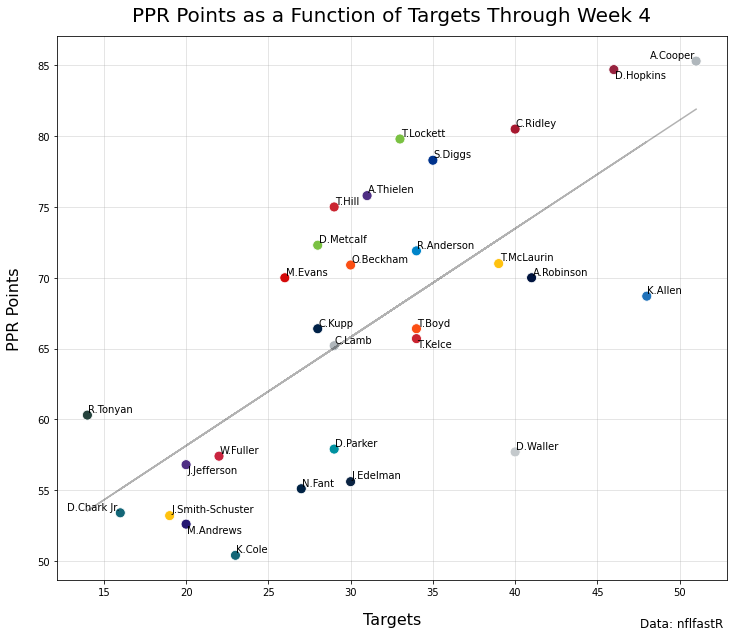

In [ ]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Create the scatterplot
sns.scatterplot(x = viz.targets, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.targets, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend line
m, b = np.polyfit(viz.targets, viz.total_fpts, 1)

plt.plot(viz.targets, m*viz.targets + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Targets Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Targets',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

Text(0.8, 0.06, 'Data: nflfastR')

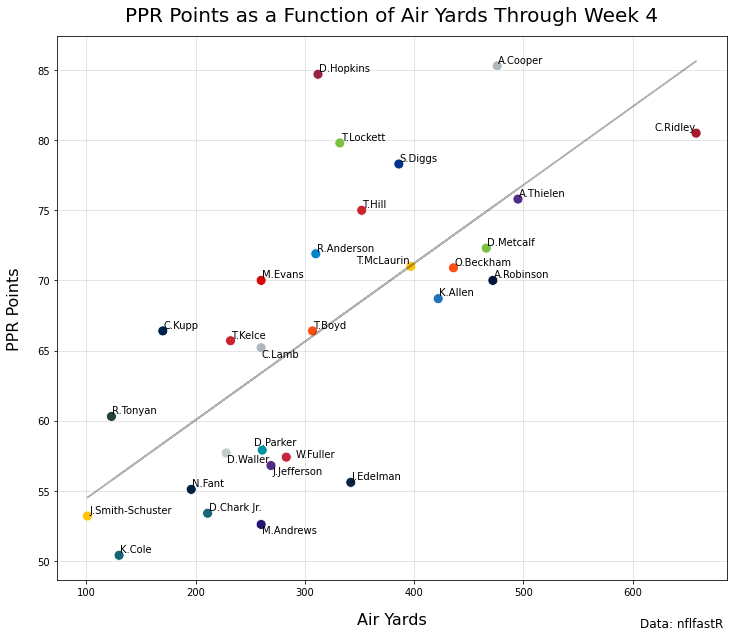

In [ ]:
#Create a figure
fig, ax = plt.subplots(figsize=(12,10))

#Map the COLORS dictionary to the posteam column
viz['color'] = viz['posteam'].map(COLORS)

#Subset the top 30 players by wopr (we don't want a crowded plot)
viz = viz[(viz.player.isin(receivers))]

#Create the scatterplot
sns.scatterplot(x = viz.air_yards, y = viz.total_fpts, c = viz.color,s=100)

#Add labels to each data point
texts = [plt.text(x0,y0,name,ha='right',va='bottom') for x0,y0,name in zip(
    viz.air_yards, viz.total_fpts, viz.player)]

adjust_text(texts)

#Add grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Add trend lines for the metrics
m, b = np.polyfit(viz.air_yards, viz.total_fpts, 1)

plt.plot(viz.air_yards, m*viz.air_yards + b, 'k', alpha=.3,linestyle='-')

#Add title, labels, and cite the data source
ax.set_title('PPR Points as a Function of Air Yards Through Week 4',fontsize=20,pad=15)
ax.set_xlabel('Air Yards',fontsize=16,labelpad=15)
ax.set_ylabel('PPR Points',fontsize=16,labelpad=15)
plt.figtext(.8,.06,'Data: nflfastR',fontsize=12)

In [ ]:
def ay_distribution(receiver, team):
  
  '''
  This function plots the air yards distribution
  for any given NFL player
  
  Parameters: 
    receiver (str): The name of the player in nflfastR
    format (J.Doe) 
  
    team (str): The team that receiver is currently on

  '''

  #Create a figure
  fig, ax = plt.subplots(figsize=(10,10))

  #Subset our data to include passes only for the
  #player and team we choose
  ay_dist = data[
                 (data.play_type=='pass') &
                 (data.qb_dropback==1) &
                 (data.epa.isna()==False) &
                 (data.receiver==receiver) &
                 (data.posteam==team)
                 ]

  #Add grid
  ax.grid(zorder=0,alpha=.4)
  ax.set_axisbelow(True)

  #Set x-axis limits
  ax.set_xlim(-10,50)

  #Add colors
  COLORS = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D',
            'CAR':'#0085CA','CHI':'#00143F','CIN':'#FB4F14','CLE':'#FB4F14',
            'DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
            'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430',
            'LA':'#002147','LAC':'#2072BA','LV':'#C4C9CC','MIA':'#0091A0',
            'MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C',
            'NYJ':'#203731','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142',
            'SF':'#C9243F','TB':'#D40909','TEN':'#4095D1','WAS':'#FFC20F'}

  #Create plot
  sns.kdeplot(ay_dist.air_yards,fill=True,color=COLORS.get(team))

  #Add title, labels, and cite the data source.
  #the formatted string allows to pass the receiver
  #parameter input to the title
  plt.title(f"{receiver}'s Air Yards Distribution",fontsize=20)
  plt.xlabel('Air Yards',fontsize=14)
  plt.ylabel('Density',fontsize=14)
  plt.figtext(0.8,0.06,'Data: nflfastR')

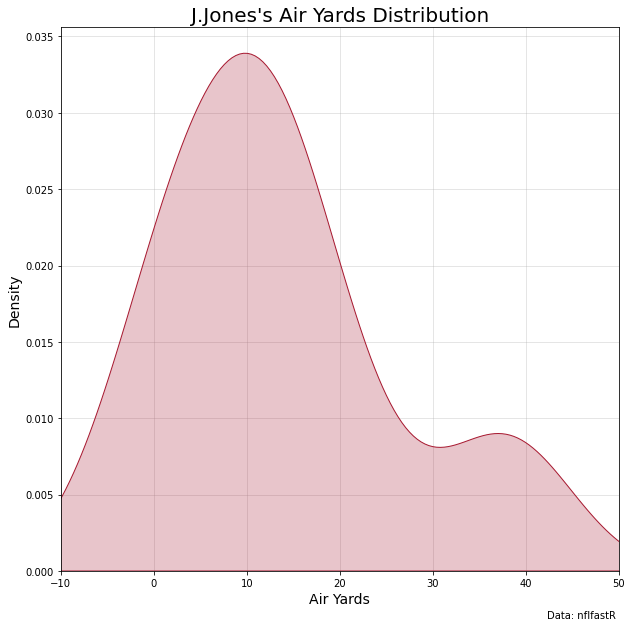

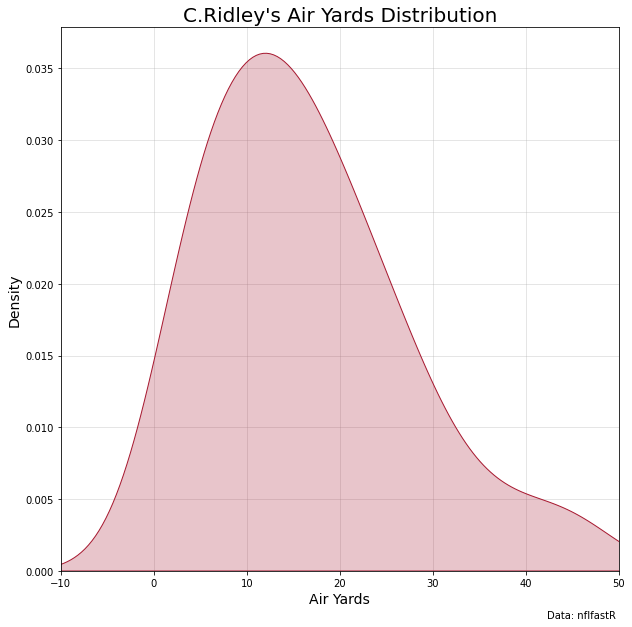

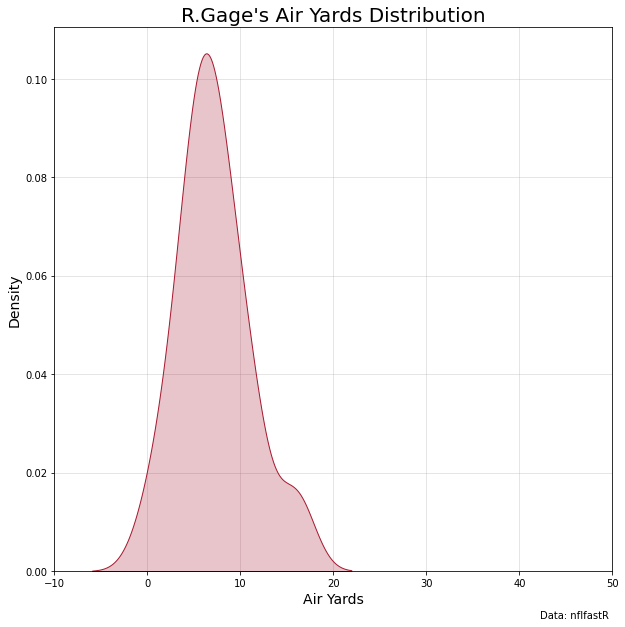

In [ ]:
ay_distribution('J.Jones','ATL')
ay_distribution('C.Ridley','ATL')
ay_distribution('R.Gage','ATL')